In [1]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3271k    0 3271k    0     0  1117k      0 --:--:--  0:00:02 --:--:-- 1117k


In [25]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

/tmp/ipykernel_11060/287369928.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


In [4]:
data.head()

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


In [26]:
data.columns = ['total','West', 'East']

In [27]:
data.dropna().describe()

,total,West,East
count,105116.000000,105116.000000,105116.000000
mean,106.545569,45.701967,60.843601
std,132.098939,59.570117,82.227507
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,60.000000,26.000000,32.000000
75%,146.000000,63.000000,80.000000
max,1097.000000,667.000000,850.000000


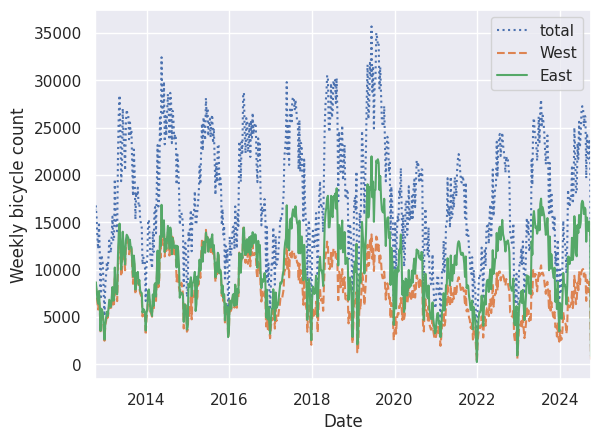

In [29]:
# Task2 Weekly bicycle crossings of Seattle’s Fremont bridge (3 lines each indicate total, east and east)

weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

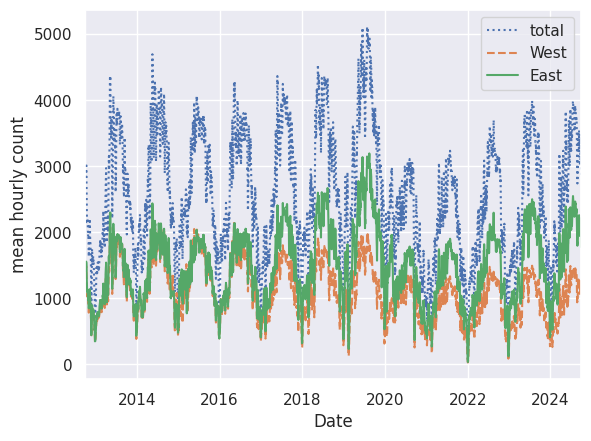

In [36]:
# Task 3 second line .mean() or sum() is also fine

daily = data.resample('D').sum()
daily.rolling(7).mean().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

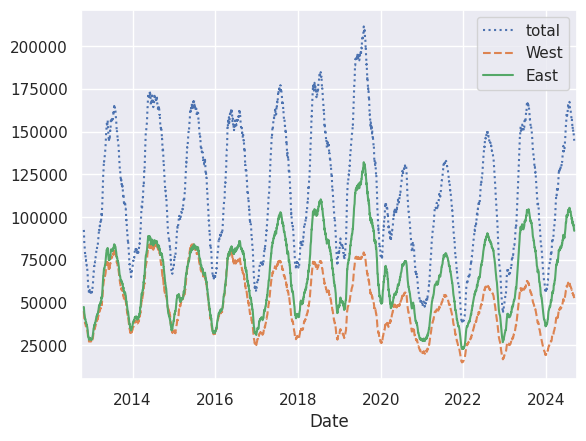

In [38]:
# Task 4 
daily.rolling(50, center=True,win_type='gaussian').sum(std=30).plot(style=[':', '--', '-']);

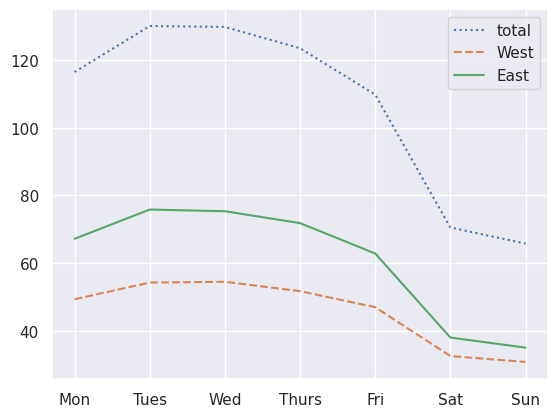

In [40]:
# Task 5

by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);


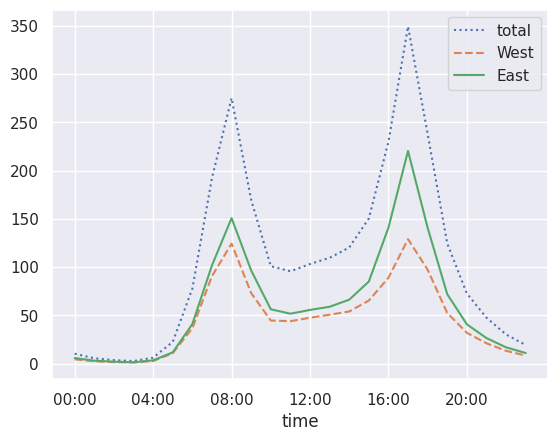

In [43]:
# Task 6
import numpy as np;
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);